In [137]:
from PIL import Image
from feature_extractor import FeatureExtractor
from pathlib import Path
import numpy as np
from elasticsearch import Elasticsearch
from os import listdir
from os.path import isfile, join
import argparse
import json
import pathlib
import IPython.display

In [85]:
es = Elasticsearch([{'host': 'localhost', 'port': 9200, 'scheme': 'http'}])

In [86]:
es.cluster.health(wait_for_status='yellow', request_timeout=1)

C:\Users\KaryGauss\AppData\Local\Temp\ipykernel_15644\1636688961.py:1: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.cluster.health(wait_for_status='yellow', request_timeout=1)
C:\Users\KaryGauss\AppData\Local\Temp\ipykernel_15644\1636688961.py:1: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.cluster.health(wait_for_status='yellow', request_timeout=1)


ObjectApiResponse({'cluster_name': 'elasticsearch', 'status': 'yellow', 'timed_out': False, 'number_of_nodes': 1, 'number_of_data_nodes': 1, 'active_primary_shards': 16, 'active_shards': 16, 'relocating_shards': 0, 'initializing_shards': 0, 'unassigned_shards': 1, 'delayed_unassigned_shards': 0, 'number_of_pending_tasks': 4, 'number_of_in_flight_fetch': 0, 'task_max_waiting_in_queue_millis': 1364217, 'active_shards_percent_as_number': 94.11764705882352})

In [88]:
index = 'bdimages'
source_no_vecs = ['feature_vector', 'image_path']

In [144]:
def display_hits(res):
    print(f"Found {res['hits']['total']['value']} hits in {res['took']} ms. Showing top {len(res['hits']['hits'])}.")
    print("")
    for hit in res['hits']['hits']:
        s = hit['_source']
        IPython.display.display(IPython.display.Image("../bdimage/" + s.get("image_path"), width=128))
        print("")

In [152]:
def search_by_image_query(feature_vector=None,size=5):
    body = {
        "query": {
            "elastiknn_nearest_neighbors": {
                "vec": feature_vector,
                "field": "feature_vector",
                "similarity": "angular",
                "model": "exact",
            }
        }
    }
    
    res = es.search(index=index, body=body, size=size, _source=source_no_vecs)
    display_hits(res)

In [91]:
fe = FeatureExtractor()

In [161]:
img = Image.open("C:/Users/KaryGauss/Downloads/hairless-dog-breeds-4801015-hero-38f7eeaf48674e1189d280e4fe738a56.jpg")

In [162]:
features = fe.extract(img)

1/1 [==============================] - 0s 163ms/step


C:\Users\KaryGauss\AppData\Local\Temp\ipykernel_15644\41618664.py:13: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=index, body=body, size=size, _source=source_no_vecs)


Found 7490 hits in 289 ms. Showing top 10.



C:\Users\KaryGauss\AppData\Local\Temp\ipykernel_15644\41618664.py:13: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  res = es.search(index=index, body=body, size=size, _source=source_no_vecs)


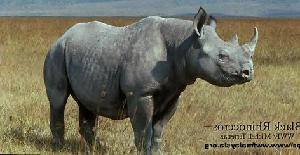

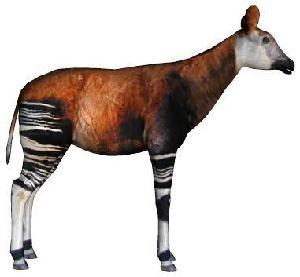

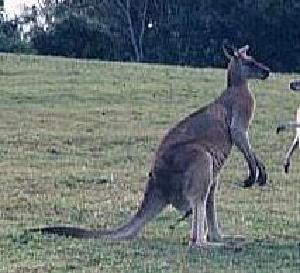

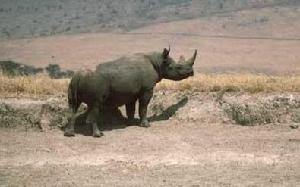

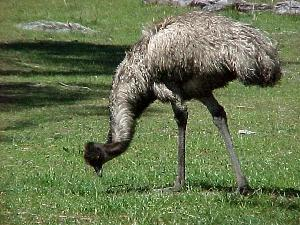

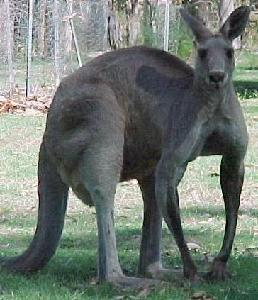

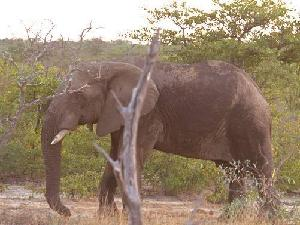

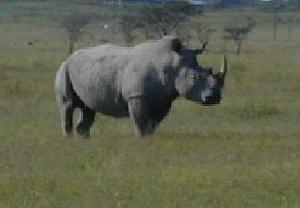

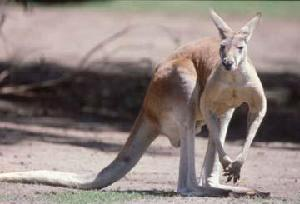

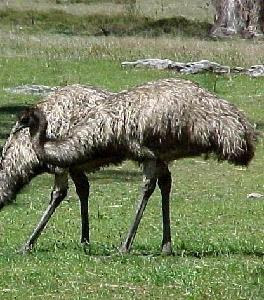

In [163]:
search_by_image_query(feature_vector = features, size = 10)

In [108]:
query = {
    "elastiknn_nearest_neighbors": {
      "vec": {
        "values": features
      },
      "field": "feature_vector",
      "model": "lsh",
      "similarity": "l2",
      "candidates": 150
    }
}

In [103]:
body = {
    "query":{
        "elastiknn_nearest_neighbors": {
            "vec": features,
            "field": "feature_vector",
            "similarity": "l2",
            "model": "lsh"
        }
    }
}

In [109]:
result = es.search(index=index, query = query, size = 5)

BadRequestError: BadRequestError(400, 'x_content_parse_exception', 'Unable to construct [nearest neighbors query] from parsed JSON')